In [1]:
from PIL import Image
import os
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt 

# Segmentation model

In [2]:
from IPython.display import display,  clear_output
import ipywidgets
from ipywidgets.widgets import Output
from ipywidgets import widgets

In [3]:
from model import load_segmenter
segmenter_path = 'weights/models.pth'
segmenter = load_segmenter( segmenter_path )
#clear_output()

==== MODEL beit_large_adapter ====
Take key encoder in provided checkpoint dict
cls_token sizes matched
Pretrained weights found at weights/models.pth and loaded with msg: _IncompatibleKeys(missing_keys=[], unexpected_keys=['spm.stem.1.weight', 'spm.stem.1.bias', 'spm.stem.1.running_mean', 'spm.stem.1.running_var', 'spm.stem.1.num_batches_tracked', 'spm.stem.4.weight', 'spm.stem.4.bias', 'spm.stem.4.running_mean', 'spm.stem.4.running_var', 'spm.stem.4.num_batches_tracked', 'spm.stem.7.weight', 'spm.stem.7.bias', 'spm.stem.7.running_mean', 'spm.stem.7.running_var', 'spm.stem.7.num_batches_tracked', 'spm.conv2.1.weight', 'spm.conv2.1.bias', 'spm.conv2.1.running_mean', 'spm.conv2.1.running_var', 'spm.conv2.1.num_batches_tracked', 'spm.conv3.1.weight', 'spm.conv3.1.bias', 'spm.conv3.1.running_mean', 'spm.conv3.1.running_var', 'spm.conv3.1.num_batches_tracked', 'spm.conv4.1.weight', 'spm.conv4.1.bias', 'spm.conv4.1.running_mean', 'spm.conv4.1.running_var', 'spm.conv4.1.num_batches_tracked',

In [39]:
def masked_image(pil_image, mask ):
    
    class_list =  ['Crack', 'ACrack', 'Wetspot', 'Efflorescence', 'Rust', 'Rockpocket', 'Hollowareas', 'Cavity',
                   'Spalling', 'Graffiti', 'Weathering', 'Restformwork', 'ExposedRebars', 
                   'Bearing', 'EJoint', 'Drainage', 'PEquipment', 'JTape', 'WConccor']
    num_cls = len(class_list)
    palette = torch.rand((num_cls,3)).numpy()
    img = transforms.ToTensor()(pil_image )
    cls_pred = (mask.flatten(1).sum(1)>100)*1.
    mask = (mask>0.5).sum(0).numpy()
    masked_im = img.clone()
    prediction = []
    for n in range(1, num_cls):
        color = palette[n]
        pred = (mask==n)*1
        for c in range(3):
            masked_im[c] = masked_im[c]*(1-pred) + masked_im[c]*pred*color[c]
        if cls_pred[n]>0:
            prediction.append(class_list[n])
    print('PREDICTION:', prediction)
    
    return transforms.ToPILImage()(masked_im.float()) 

In [40]:
def make_prediction(segmenter, pil_image ):
    transform =  transforms.Compose([ transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            ])
    mask = segmenter(transform(pil_image).unsqueeze(0))
    masked_im =  masked_image(pil_image, mask.squeeze() )
    #clear_output()
    display(masked_im)
    

model running ...


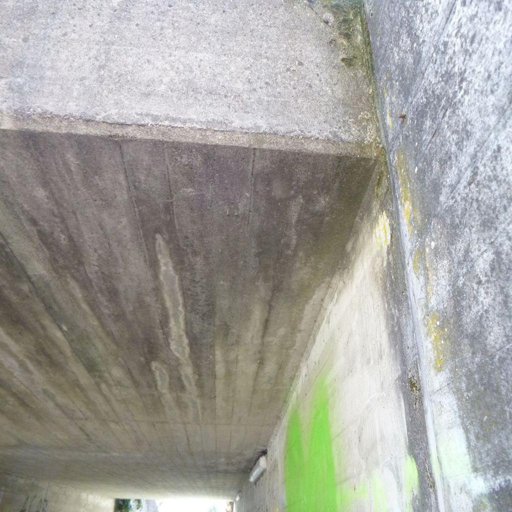

PREDICTION: ['Efflorescence', 'Rust', 'Spalling', 'Graffiti', 'Weathering']


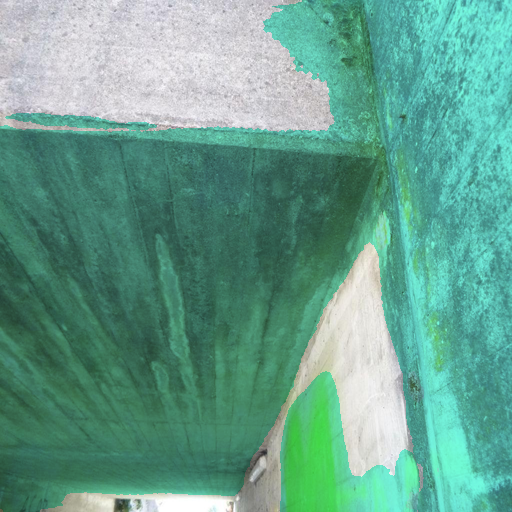

In [42]:
images_path = "data/testdev/"
images_list = os.listdir(images_path)
i = random.randint(0, len(images_list)-1)
img_name = images_list[i]
img_path = os.path.join( images_path , img_name )
img = Image.open(img_path).resize((512,512))
print('model running ...')
display(img)
make_prediction(segmenter, img)